In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
import kagglehub


In [9]:
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\austinreese\craigslist-carstrucks-data\versions\10


In [10]:
file_path = "C:\\Users\\User\\.cache\\kagglehub\\datasets\\austinreese\\craigslist-carstrucks-data\\versions\\10"



In [24]:
df = pd.read_csv(r"C:\Users\User\.cache\kagglehub\datasets\austinreese\craigslist-carstrucks-data\versions\10\vehicles.csv")

df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

data cleaning

In [25]:
df.shape

(426880, 26)

In [26]:
# check null values
# first see the null values 
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [27]:
# a statistical view 
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [28]:
# check data type
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [23]:
print(df.columns)



Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


EDA

In [30]:
#1. Average Price by Manufacturer??
avg_price_by_manufacturer = df.groupby('manufacturer')['price'].mean().sort_values(ascending=False)
print(avg_price_by_manufacturer)


manufacturer
mercedes-benz      531710.557333
volvo              383755.147896
toyota             234294.682621
jeep               150717.819659
chevrolet          115676.101645
ferrari            107438.736842
aston-martin        53494.541667
tesla               38354.456221
buick               36784.954736
ford                36411.718025
porsche             31946.061416
gmc                 30405.877152
alfa-romeo          28237.348941
ram                 27728.339167
rover               27182.898722
bmw                 26740.261446
jaguar              26549.176259
audi                23574.849993
acura               19842.869522
lincoln             19802.274645
infiniti            19561.849229
cadillac            19439.520926
lexus               19206.152683
nissan              18827.332826
datsun              15149.666667
dodge               15003.200554
mini                14163.474747
mitsubishi          13743.070778
morgan              13100.000000
subaru              13055.5125

In [31]:
#Most Common Car Models
common_car_models = df['model'].value_counts().head(10)
print(common_car_models)

model
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
accord            2969
wrangler          2848
civic             2799
altima            2779
escape            2746
Name: count, dtype: int64


In [29]:
# Average Price by Condition
avg_price_by_condition = df.groupby('condition')['price'].mean()
print(avg_price_by_condition)


condition
excellent     51346.825953
fair         761090.005614
good          32545.203102
like new      36402.041978
new           23657.266667
salvage        3605.534110
Name: price, dtype: float64


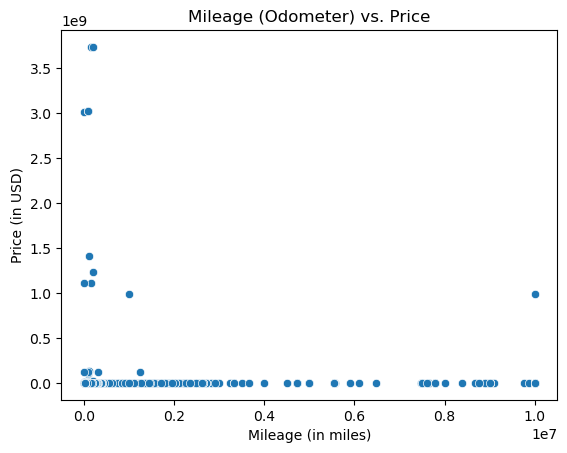

In [32]:
# Mileage vs. Price
sns.scatterplot(data=df, x='odometer', y='price')
plt.title('Mileage (Odometer) vs. Price')
plt.xlabel('Mileage (in miles)')
plt.ylabel('Price (in USD)')
plt.show()


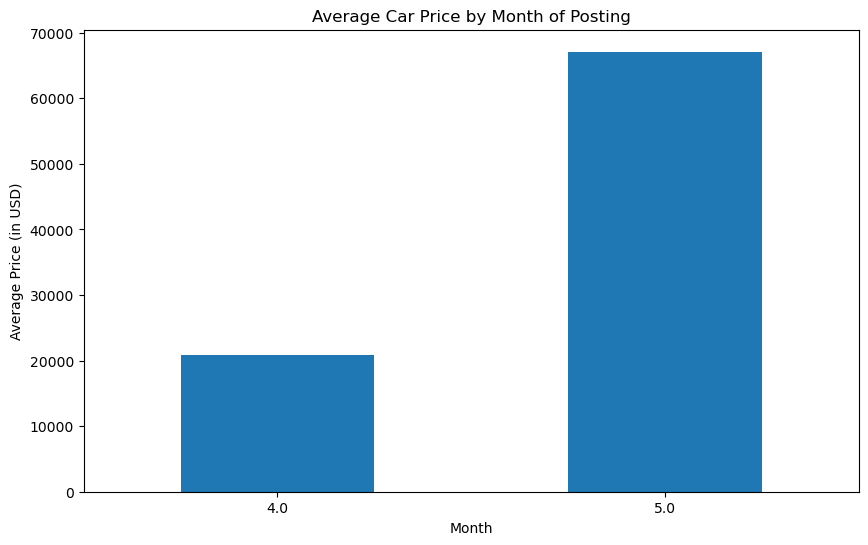

In [34]:
# Price Distribution by Posting Date (Seasonality)

df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# Extract month from posting date to analyze seasonality
df['month'] = df['posting_date'].dt.month
avg_price_by_month = df.groupby('month')['price'].mean()

# Plot seasonality in prices
plt.figure(figsize=(10, 6))
avg_price_by_month.plot(kind='bar')
plt.title('Average Car Price by Month of Posting')
plt.xlabel('Month')
plt.ylabel('Average Price (in USD)')
plt.xticks(rotation=0)
plt.show()


In [36]:
# Most Common Counties with Listings
ommon_counties = df['county'].value_counts().head(10)
print(common_counties)

Series([], Name: count, dtype: int64)


In [37]:
#Price Difference by Transmission Type
avg_price_by_transmission = df.groupby('transmission')['price'].mean().sort_values(ascending=False)
print(avg_price_by_transmission)

transmission
manual       198416.336452
automatic     74881.003396
other         30003.788376
Name: price, dtype: float64


In [38]:
# Price Distribution by Fuel Type
avg_price_by_fuel = df.groupby('fuel')['price'].mean().sort_values(ascending=False)
print(avg_price_by_fuel)

fuel
diesel      118177.693467
gas          73902.259659
other        66811.403899
electric     24648.362191
hybrid       14582.430948
Name: price, dtype: float64
